In [1]:
import numpy as np
import pandas as pd
import pyarrow.feather as feather
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
snp = pd.read_csv('../DATA/SPX.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
nkx = pd.read_csv('../DATA/NKX.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
dax = pd.read_csv('../DATA/DAX.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
wig = pd.read_csv('../DATA/WIG.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
kospi = pd.read_csv('../DATA/KOSPI.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
bvp = pd.read_csv('../DATA/BVP.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )
spy = pd.read_csv('../DATA/SPY_live.csv', header=0, index_col="Date", parse_dates=True, infer_datetime_format=True )

# snp_ret = snp["Close"].pct_change().dropna()
# nkx_ret = nkx["Close"].pct_change().dropna()
# dax_ret = dax["Close"].pct_change().dropna()
# wig_ret = wig["Close"].pct_change().dropna()
# kospi_ret = kospi["Close"].pct_change().dropna()
# bvp_ret = bvp["Close"].pct_change().dropna()

snp_ret = pd.Series(np.diff(np.log(snp["Close"])*100), index=snp.index[1:])
nkx_ret = pd.Series(np.diff(np.log(nkx["Close"])*100), index=nkx.index[1:])
dax_ret = pd.Series(np.diff(np.log(dax["Close"])*100), index=dax.index[1:])
wig_ret = pd.Series(np.diff(np.log(wig["Close"])*100), index=wig.index[1:])
#wig20_ret = pd.Series(np.diff(np.log(wig20["Close"])), index=wig20.index[1:])
kospi_ret = pd.Series(np.diff(np.log(kospi["Close"])*100), index=kospi.index[1:])
bvp_ret = pd.Series(np.diff(np.log(bvp["Close"])*100), index=bvp.index[1:])
#mrv_ret = pd.Series(np.diff(np.log(mrv["Close"])), index=mrv.index[1:])

spy_ret = pd.Series(np.diff(np.log(spy["Close"])*100), index=spy.index[1:])


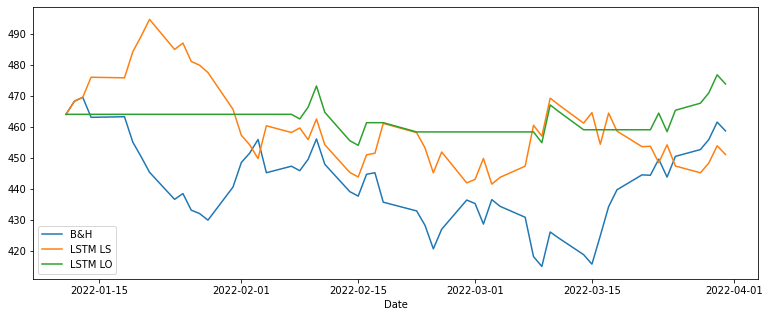

In [3]:
#plot equity lines for spy live

spy_eq_lstm = feather.read_feather('../EXPORTS/rets_spy_madl_lstm_live.feather')

spy_eq_lstm.index = spy_ret.tail(len(spy_eq_lstm)).index

plt.figure(figsize=(13, 5))
sns.lineplot(data=spy_eq_lstm[["eql_bh", "eql_ls", "eql_lo"]],  dashes=False)
plt.legend(loc='lower left', labels=['B&H', 'LSTM LS', 'LSTM LO'])

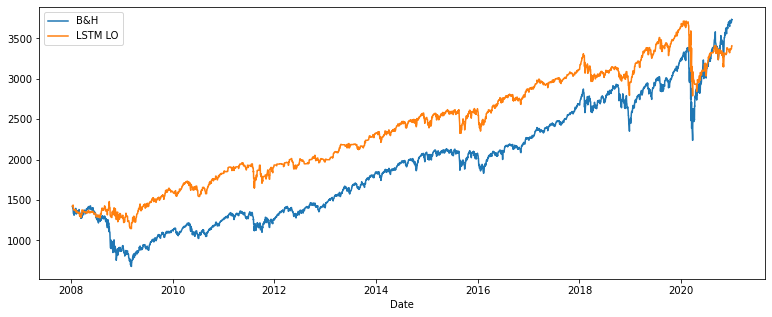

In [4]:
#plot equity lines for made

snp_eq = feather.read_feather('../EXPORTS/rets_spx_mse_dnn.feather')

snp_eq.index = snp_ret.tail(3267).index

plt.figure(figsize=(13, 5))
sns.lineplot(data=snp_eq[["eql_bh", "eql_lo"]], dashes=False)
plt.legend(loc='upper left', labels=['B&H', 'LSTM LO'])

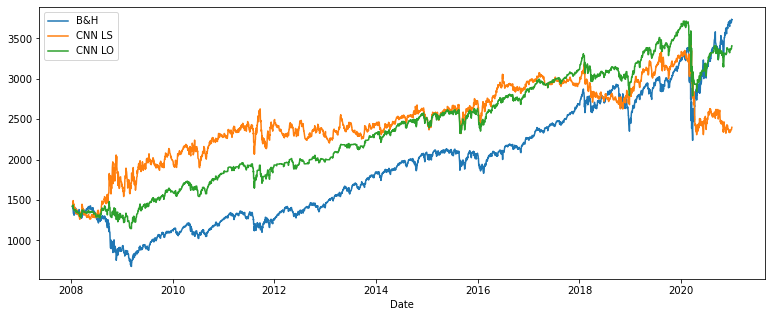

In [5]:
#plot equity lines for mse

snp_eq_dnn = feather.read_feather('../EXPORTS/rets_spx_mse_dnn.feather')

snp_eq_dnn.index = snp_ret.tail(len(snp_eq_dnn)).index

plt.figure(figsize=(13, 5))
sns.lineplot(data=snp_eq_dnn[["eql_bh", "eql_ls", "eql_lo"]],  dashes=False)
plt.legend(loc='upper left', labels=['B&H', 'CNN LS', 'CNN LO'])

In [6]:
snp_eq_dnn

,preds_list,signal,signal_long,eql_bh,eql_ls,eql_lo
Date,,,,,,
2008-01-11,-0.005407,-1.0,0.0,1420.33,1420.330000,1420.330000
2008-01-14,0.002000,1.0,1.0,1401.02,1439.640000,1420.330000
2008-01-15,-0.002324,-1.0,0.0,1416.25,1455.289825,1435.769912
2008-01-16,0.003041,1.0,1.0,1380.95,1491.562891,1435.769912
2008-01-17,0.001443,1.0,1.0,1373.20,1483.192123,1427.712259
...,...,...,...,...,...,...
2020-12-24,0.000180,1.0,1.0,3690.01,2361.772408,3361.282901
2020-12-28,0.000761,1.0,1.0,3703.06,2370.124995,3373.170333
2020-12-29,-0.000143,-1.0,0.0,3735.36,2390.798449,3402.592865


In [7]:
nkx_eq_dnn = feather.read_feather('../EXPORTS/rets_nkx_mse_dnn.feather')
nkx_eq_dnn.index = nkx_ret.tail(len(nkx_eq_dnn)).index

dax_eq_dnn = feather.read_feather('../EXPORTS/rets_dax_mse_dnn.feather')
dax_eq_dnn.index = dax_ret.tail(len(dax_eq_dnn)).index

kospi_eq_dnn = feather.read_feather('../EXPORTS/rets_kospi_mse_dnn.feather')
kospi_eq_dnn.index = kospi_ret.tail(len(kospi_eq_dnn)).index

wig_eq_dnn = feather.read_feather('../EXPORTS/rets_wig_mse_dnn.feather')
wig_eq_dnn.index = wig_ret.tail(len(wig_eq_dnn)).index

bvp_eq_dnn = feather.read_feather('../EXPORTS/rets_bvp_mse_dnn.feather')
bvp_eq_dnn.index = bvp_ret.tail(len(bvp_eq_dnn)).index


In [8]:
kospi_eq_dnn

,preds_list,signal,signal_long,eql_bh,eql_ls,eql_lo
Date,,,,,,
2008-03-12,0.005052,1.0,1.0,1641.48,1641.480000,1641.480000
2008-03-13,-0.002486,-1.0,0.0,1658.83,1658.830000,1658.830000
2008-03-14,0.000590,1.0,1.0,1615.62,1702.040000,1658.830000
2008-03-17,0.004506,1.0,1.0,1600.26,1685.858389,1643.059194
2008-03-18,0.001870,1.0,1.0,1574.43,1658.646735,1616.538367
...,...,...,...,...,...,...
2020-11-24,-0.000257,-1.0,0.0,2602.59,946.119456,1711.251218
2020-11-25,0.000201,1.0,1.0,2617.76,940.604706,1711.251218
2020-11-26,0.000049,1.0,1.0,2601.54,934.776590,1700.648070


In [9]:
#do zamiany na punkty procentowe

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(nkx_ret.tail(len(nkx_eq_dnn['preds_list'] )), nkx_eq_dnn['preds_list']*100 )

1.0530753437063225

In [10]:
def madl(y_true, y_pred):
    
    loss = (-1. * tf.sign(y_true * y_pred) * (tf.abs(y_true)))
    
    return tf.reduce_mean(loss, axis=-1)

In [11]:
madl(nkx_ret.tail(len(nkx_eq_dnn['preds_list'] )), nkx_eq_dnn['preds_list']*100 )

<tf.Tensor: shape=(), dtype=float64, numpy=0.01410711825464521>

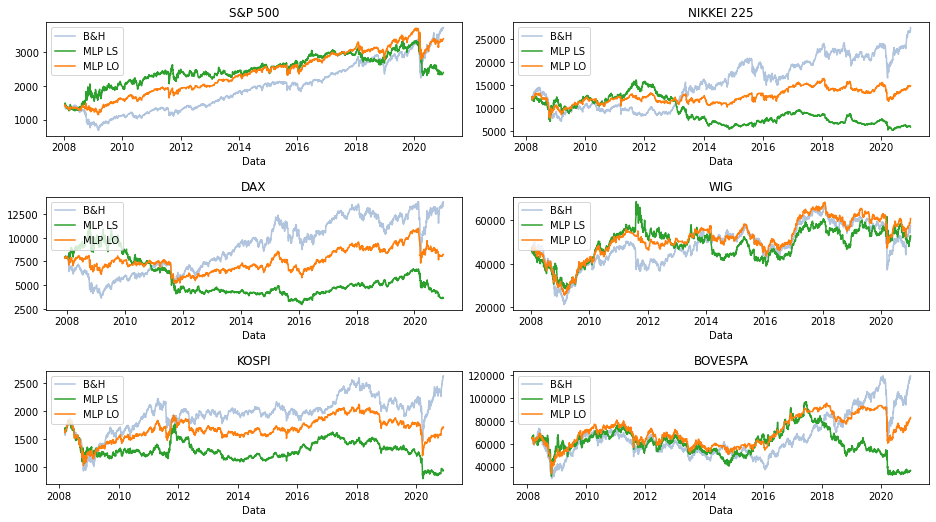

In [12]:
#PLOT MSE DNNs
fig, axes = plt.subplots(3, 2, figsize=(13, 7))
fig.tight_layout(h_pad=4, w_pad=2)

sns.lineplot(ax=axes[0, 0], data=snp_eq_dnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='')
axes[0,0].legend(loc='upper left', labels=['B&H', 'MLP LS', 'MLP LO'])
sns.lineplot(ax=axes[0, 1], data=nkx_eq_dnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[0,1].set(title='NIKKEI 225', xlabel='Data', ylabel='')
axes[0,1].legend(loc='upper left', labels=['B&H', 'MLP LS', 'MLP LO'])
sns.lineplot(ax=axes[1, 0], data=dax_eq_dnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[1,0].set(title='DAX', xlabel='Data', ylabel='')
axes[1,0].legend(loc='upper left', labels=['B&H', 'MLP LS', 'MLP LO'])
sns.lineplot(ax=axes[1, 1], data=wig_eq_dnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[1,1].set(title='WIG', xlabel='Data', ylabel='')
axes[1,1].legend(loc='upper left', labels=['B&H', 'MLP LS', 'MLP LO'])
sns.lineplot(ax=axes[2, 0], data=kospi_eq_dnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[2,0].set(title='KOSPI', xlabel='Data', ylabel='')
axes[2,0].legend(loc='upper left', labels=['B&H', 'MLP LS', 'MLP LO'])
sns.lineplot(ax=axes[2, 1], data=bvp_eq_dnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[2,1].set(title='BOVESPA', xlabel='Data', ylabel='')
axes[2,1].legend(loc='upper left', labels=['B&H', 'MLP LS', 'MLP LO'])

In [13]:
len(snp_eq_dnn)

3267

In [17]:
#LOAD CNN MSE DATA
snp_eq_cnn = feather.read_feather('../EXPORTS/rets_spx_mse_cnn.feather')
snp_eq_cnn.index = snp_ret.tail(len(snp_eq_cnn)).index

nkx_eq_cnn = feather.read_feather('../EXPORTS/rets_nkx_mse_cnn.feather')
nkx_eq_cnn.index = nkx_ret.tail(len(nkx_eq_cnn)).index

dax_eq_cnn = feather.read_feather('../EXPORTS/rets_dax_mse_cnn.feather')
dax_eq_dnn.index = dax_ret.tail(len(dax_eq_cnn)).index

kospi_eq_cnn = feather.read_feather('../EXPORTS/rets_kospi_mse_cnn.feather')
kospi_eq_cnn.index = kospi_ret.tail(len(kospi_eq_cnn)).index

wig_eq_cnn = feather.read_feather('../EXPORTS/rets_wig_mse_cnn.feather')
wig_eq_cnn.index = wig_ret.tail(len(wig_eq_cnn)).index

bvp_eq_cnn = feather.read_feather('../EXPORTS/rets_bvp_mse_cnn.feather')
bvp_eq_cnn.index = bvp_ret.tail(len(bvp_eq_cnn)).index

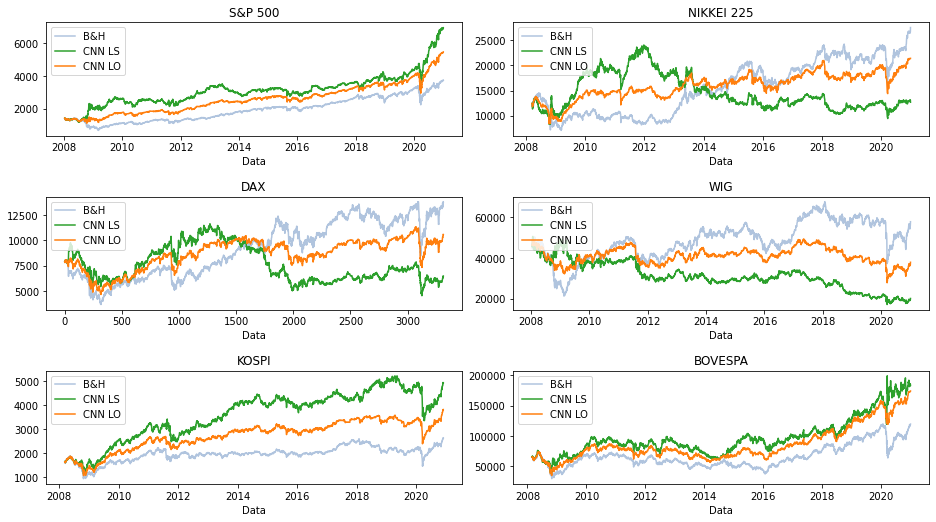

In [18]:
#PLOT MSE CNNs
fig, axes = plt.subplots(3, 2, figsize=(13, 7))
fig.tight_layout(h_pad=4, w_pad=2)

sns.lineplot(ax=axes[0, 0], data=snp_eq_cnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='')
axes[0,0].legend(loc='upper left', labels=['B&H', 'CNN LS', 'CNN LO'])
sns.lineplot(ax=axes[0, 1], data=nkx_eq_cnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[0,1].set(title='NIKKEI 225', xlabel='Data', ylabel='')
axes[0,1].legend(loc='upper left', labels=['B&H', 'CNN LS', 'CNN LO'])
sns.lineplot(ax=axes[1, 0], data=dax_eq_cnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[1,0].set(title='DAX', xlabel='Data', ylabel='')
axes[1,0].legend(loc='upper left', labels=['B&H', 'CNN LS', 'CNN LO'])
sns.lineplot(ax=axes[1, 1], data=wig_eq_cnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[1,1].set(title='WIG', xlabel='Data', ylabel='')
axes[1,1].legend(loc='upper left', labels=['B&H', 'CNN LS', 'CNN LO'])
sns.lineplot(ax=axes[2, 0], data=kospi_eq_cnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[2,0].set(title='KOSPI', xlabel='Data', ylabel='')
axes[2,0].legend(loc='upper left', labels=['B&H', 'CNN LS', 'CNN LO'])
sns.lineplot(ax=axes[2, 1], data=bvp_eq_cnn[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[2,1].set(title='BOVESPA', xlabel='Data', ylabel='')
axes[2,1].legend(loc='upper left', labels=['B&H', 'CNN LS', 'CNN LO'])

In [19]:
#LOAD LSTM MSE DATA
snp_eq_lstm = feather.read_feather('../EXPORTS/rets_spx_mse_lstm.feather')
snp_eq_lstm.index = snp_ret.tail(len(snp_eq_lstm)).index

nkx_eq_lstm = feather.read_feather('../EXPORTS/rets_nkx_mse_lstm.feather')
nkx_eq_lstm.index = nkx_ret.tail(len(nkx_eq_lstm)).index

dax_eq_lstm = feather.read_feather('../EXPORTS/rets_dax_mse_lstm.feather')
dax_eq_lstm.index = dax_ret.tail(len(dax_eq_lstm)).index

kospi_eq_lstm = feather.read_feather('../EXPORTS/rets_kospi_mse_lstm.feather')
kospi_eq_lstm.index = kospi_ret.tail(len(kospi_eq_lstm)).index

wig_eq_lstm = feather.read_feather('../EXPORTS/rets_wig_mse_lstm.feather')
wig_eq_lstm.index = wig_ret.tail(len(wig_eq_lstm)).index

bvp_eq_lstm = feather.read_feather('../EXPORTS/rets_bvp_mse_lstm.feather')
bvp_eq_lstm.index = bvp_ret.tail(len(bvp_eq_lstm)).index

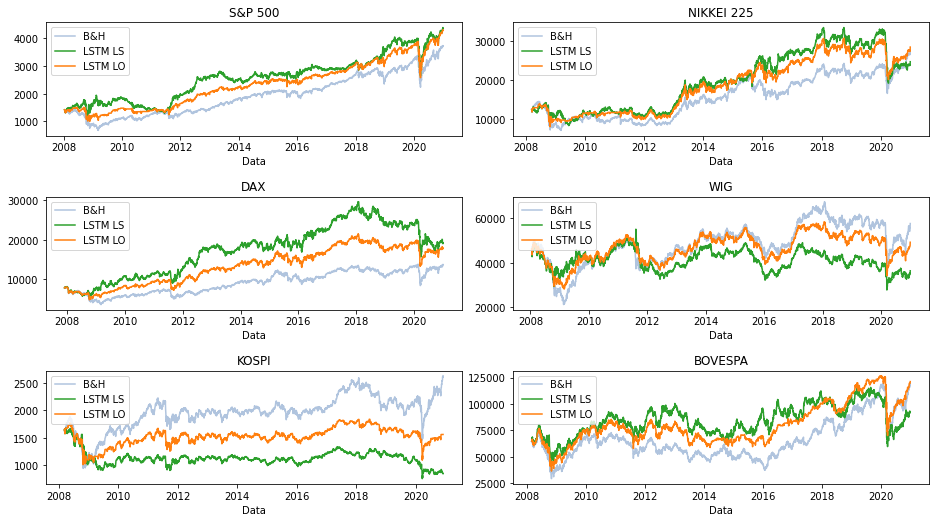

In [20]:
#PLOT MSE LSTMs
fig, axes = plt.subplots(3, 2, figsize=(13, 7))
fig.tight_layout(h_pad=4, w_pad=2)

sns.lineplot(ax=axes[0, 0], data=snp_eq_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='')
axes[0,0].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[0, 1], data=nkx_eq_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[0,1].set(title='NIKKEI 225', xlabel='Data', ylabel='')
axes[0,1].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[1, 0], data=dax_eq_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[1,0].set(title='DAX', xlabel='Data', ylabel='')
axes[1,0].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[1, 1], data=wig_eq_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[1,1].set(title='WIG', xlabel='Data', ylabel='')
axes[1,1].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[2, 0], data=kospi_eq_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[2,0].set(title='KOSPI', xlabel='Data', ylabel='')
axes[2,0].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[2, 1], data=bvp_eq_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[2,1].set(title='BOVESPA', xlabel='Data', ylabel='')
axes[2,1].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])

In [21]:
#LOAD LSTM MADL DATA
snp_eq_madl_lstm = feather.read_feather('../EXPORTS/rets_spx_madl_lstm.feather')
snp_eq_madl_lstm.index = snp_ret.tail(len(snp_eq_madl_lstm)).index

nkx_eq_madl_lstm = feather.read_feather('../EXPORTS/rets_nkx_madl_lstm.feather')
nkx_eq_madl_lstm.index = nkx_ret.tail(len(nkx_eq_madl_lstm)).index

dax_eq_madl_lstm = feather.read_feather('../EXPORTS/rets_dax_madl_lstm.feather')
dax_eq_madl_lstm.index = dax_ret.tail(len(dax_eq_madl_lstm)).index

kospi_eq_madl_lstm = feather.read_feather('../EXPORTS/rets_kospi_madl_lstm.feather')
kospi_eq_madl_lstm.index = kospi_ret.tail(len(kospi_eq_madl_lstm)).index

wig_eq_madl_lstm = feather.read_feather('../EXPORTS/rets_wig_madl_lstm.feather')
wig_eq_madl_lstm.index = wig_ret.tail(len(wig_eq_madl_lstm)).index

bvp_eq_madl_lstm = feather.read_feather('../EXPORTS/rets_bvp_madl_lstm.feather')
bvp_eq_madl_lstm.index = bvp_ret.tail(len(bvp_eq_madl_lstm)).index

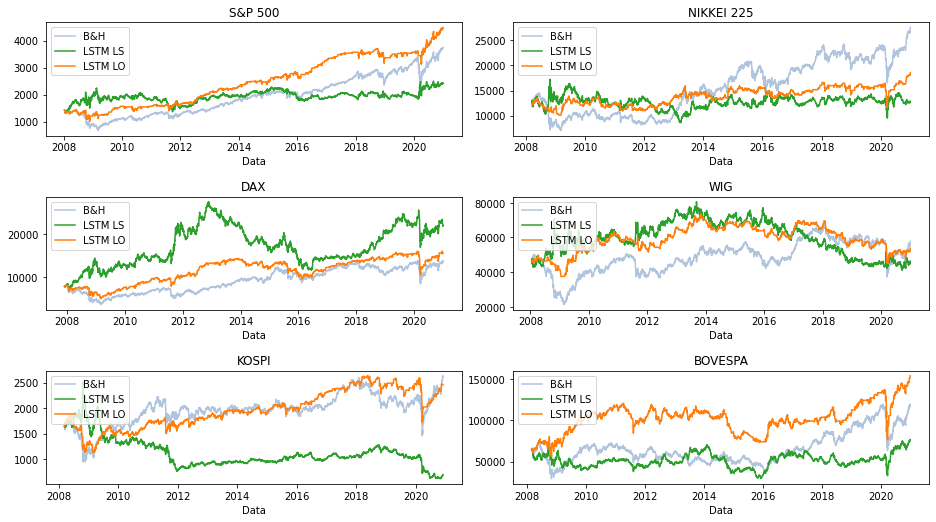

In [22]:
#PLOT MADL LSTMs
fig, axes = plt.subplots(3, 2, figsize=(13, 7))
fig.tight_layout(h_pad=4, w_pad=2)

sns.lineplot(ax=axes[0, 0], data=snp_eq_madl_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='')
axes[0,0].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[0, 1], data=nkx_eq_madl_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[0,1].set(title='NIKKEI 225', xlabel='Data', ylabel='')
axes[0,1].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[1, 0], data=dax_eq_madl_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[1,0].set(title='DAX', xlabel='Data', ylabel='')
axes[1,0].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[1, 1], data=wig_eq_madl_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[1,1].set(title='WIG', xlabel='Data', ylabel='')
axes[1,1].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[2, 0], data=kospi_eq_madl_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[2,0].set(title='KOSPI', xlabel='Data', ylabel='')
axes[2,0].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])
sns.lineplot(ax=axes[2, 1], data=bvp_eq_madl_lstm[["eql_bh", "eql_ls", "eql_lo"]], dashes=False, palette=['lightsteelblue', 'tab:green', 'tab:orange'])
axes[2,1].set(title='BOVESPA', xlabel='Data', ylabel='')
axes[2,1].legend(loc='upper left', labels=['B&H', 'LSTM LS', 'LSTM LO'])

In [23]:
#Plot volatility forecasts

lstm_vol = feather.read_feather('../EXPORTS/lstm_sigma_dt_snp.feather')
garch_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_snp.feather')

garch_vol = garch_vol.tail(2487).reset_index(drop=True)
garch_vol = garch_vol.drop(columns=["vGKYZ_252"])

snp_vol =  pd.concat([lstm_vol,garch_vol], axis=1)
snp_vol = snp_vol.rename({'Realized Ret' : 'Stopa zwrotu', 'Date' : 'Data', 'vGKYZ_252': 'GKYZ', 'gjrGARCH_std_sigma': 'GJR-GARCH-STD', 'LSTM-gjrGARCH-STD' : 'LSTM-GJR-GARCH-STD'}, axis=1)

snp_vol.index = snp_ret.tail(2487).index

snp_vol

,GKYZ,LSTM-GARCH-NORM,LSTM-GARCH-STD,LSTM-GARCH-SSTD,LSTM-eGARCH-NORM,LSTM-eGARCH-STD,LSTM-eGARCH-SSTD,LSTM-gjrGARCH-NORM,LSTM-GJR-GARCH-STD,LSTM-gjrGARCH-SSTD,...,apARCH_std_sigma,apARCH_std_skew,apARCH_std_shape,apARCH_sstd_mu,apARCH_sstd_sigma,apARCH_sstd_skew,apARCH_sstd_shape,vYZ_252,vGKYZ,SvOLHC
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-15,0.510583,0.839220,0.840922,0.829220,0.812156,0.702522,0.780015,0.920081,0.864799,0.883173,...,0.576421,0.0,5.081885,0.068158,0.570490,0.857578,5.574777,0.498982,0.321637,0.453143
2011-02-16,0.492815,0.833596,0.872837,0.821614,0.827339,0.720936,0.820952,0.903392,0.842461,0.857271,...,0.648009,0.0,4.913013,0.112781,0.638983,0.859069,5.383496,0.572544,0.310444,0.437373
2011-02-17,0.794901,0.833920,0.831622,0.817077,0.795755,0.688877,0.772310,0.892029,0.833894,0.855019,...,0.605337,0.0,5.408318,0.039578,0.602113,0.859798,5.857388,0.639968,0.500741,0.705475
2011-02-18,0.458967,0.832726,0.850429,0.813095,0.812564,0.707166,0.800921,0.908489,0.839658,0.858879,...,0.563821,0.0,5.512655,0.068050,0.562273,0.857965,5.928274,0.620816,0.289122,0.407333
2011-02-22,1.502393,0.804819,0.852134,0.784381,0.823300,0.716077,0.821939,0.880782,0.813638,0.829215,...,0.532038,0.0,5.226834,0.079911,0.532985,0.858401,5.664748,1.069452,0.946419,1.333374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.407085,0.728263,0.728737,0.713890,0.790232,0.785844,0.784841,0.760610,0.803535,0.767108,...,0.699595,0.0,5.361094,0.069018,0.697601,0.753898,5.871242,0.632494,0.256440,0.361288
2020-12-28,0.948150,0.712633,0.718430,0.692685,0.773054,0.782760,0.778887,0.731817,0.777691,0.751698,...,0.628602,0.0,5.061337,0.056454,0.630146,0.765894,5.440138,0.607377,0.597278,0.841483
2020-12-29,0.994227,0.774782,0.785194,0.754211,0.821490,0.848419,0.847006,0.772281,0.802465,0.800821,...,0.649706,0.0,5.182291,0.001394,0.650705,0.737401,5.960387,0.648180,0.626304,0.882376


<AxesSubplot:xlabel='Date'>

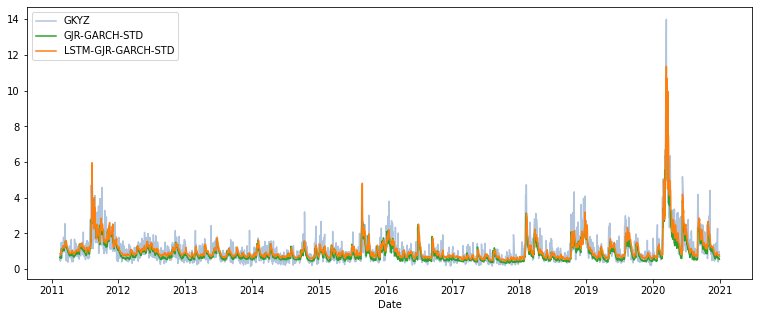

In [24]:
snp_vol.index = snp_ret.tail(2487).index

#plot
plt.figure(figsize=(13, 5))
#sns.lineplot(data=snp_vol[["Realized Ret"]], alpha  = 0.2)
#sns.lineplot(data=snp_vol[["GKYZ"]], palette=["lightsteelblue"], alpha  = 1)
sns.lineplot(data=snp_vol[["GKYZ", "GJR-GARCH-STD", "LSTM-GJR-GARCH-STD"]], palette=["lightsteelblue","tab:green", "tab:orange"], dashes=False)

#another way to plot
#snp_vol[["Realized Ret", "SvOLHC","GRU-GARCH-NORM", "GARCH_norm_sigma"]].plot(figsize=(13,5))

(0.9519521746258419, 0.0)

In [28]:
#NKX
lstm_vol = feather.read_feather('../EXPORTS/lstm_sigma_dt_nkx.feather')
garch_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_nkx.feather')

garch_vol = garch_vol.tail(2487).reset_index(drop=True)
garch_vol = garch_vol.drop(columns=["vGKYZ_252"])

nkx_vol =  pd.concat([lstm_vol,garch_vol], axis=1)
nkx_vol = nkx_vol.rename({'Realized Ret' : 'Stopa zwrotu', 'vGKYZ_252': 'GKYZ', 'gjrGARCH_sstd_sigma': 'GJR-GARCH-SSTD', 'LSTM-gjrGARCH-SSTD' : 'LSTM-GJR-GARCH-SSTD'}, axis=1)

nkx_vol.index = nkx_ret.tail(2487).index

nkx_vol

,GKYZ,LSTM-GARCH-NORM,LSTM-GARCH-STD,LSTM-GARCH-SSTD,LSTM-eGARCH-NORM,LSTM-eGARCH-STD,LSTM-eGARCH-SSTD,LSTM-gjrGARCH-NORM,LSTM-gjrGARCH-STD,LSTM-GJR-GARCH-SSTD,...,apARCH_std_sigma,apARCH_std_skew,apARCH_std_shape,apARCH_sstd_mu,apARCH_sstd_sigma,apARCH_sstd_skew,apARCH_sstd_shape,vYZ_252,vGKYZ,SvOLHC
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-02,0.608717,1.445394,1.349575,1.445652,1.482254,1.424205,1.414622,1.475177,1.455029,1.527546,...,1.236009,0.0,99.983057,-0.033405,1.229079,0.872049,59.999082,1.266551,0.383456,0.476961
2010-11-04,2.302539,1.363194,1.298583,1.440367,1.647096,1.521938,1.518150,1.480860,1.430399,1.529748,...,1.212458,0.0,99.979980,-0.032516,1.201455,0.871322,59.967835,1.809788,1.450463,1.804157
2010-11-05,2.937273,1.494266,1.392985,1.485305,1.500827,1.458602,1.432310,1.527096,1.516739,1.585664,...,1.236092,0.0,71.663189,-0.024334,1.232537,0.875694,59.998474,1.286580,1.850308,2.301503
2010-11-08,1.350716,1.781707,1.543505,1.608651,1.577885,1.579206,1.561677,1.614695,1.613386,1.680920,...,1.327620,0.0,99.941507,-0.016137,1.340322,0.882756,59.989563,1.496071,0.850871,1.058354
2010-11-09,1.292145,1.549478,1.632207,1.745171,1.872197,1.807821,1.805323,1.681261,1.629179,1.748224,...,1.338013,0.0,30.609939,0.003189,1.335888,0.911489,26.027872,1.744509,0.813975,1.012461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.931573,1.153847,1.132751,1.145267,1.118264,1.126946,1.102822,1.143543,1.117848,1.114718,...,0.858281,0.0,5.674143,0.020499,0.847137,0.931842,5.769586,0.750955,0.586836,0.729935
2020-12-25,0.345931,1.140239,1.121425,1.142714,1.145529,1.132654,1.118569,1.161727,1.136420,1.137486,...,0.805788,0.0,5.699505,0.021298,0.796594,0.926995,5.782927,0.598380,0.217916,0.271054
2020-12-28,0.556710,1.086700,1.079914,1.085293,1.079344,1.094979,1.106395,1.123309,1.134861,1.118795,...,0.759598,0.0,5.680094,0.019563,0.747245,0.929685,5.749998,0.411179,0.350694,0.436210


In [29]:
#DAX
lstm_vol = feather.read_feather('../EXPORTS/lstm_sigma_dt_dax.feather')
garch_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_dax.feather')

garch_vol = garch_vol.tail(2487).reset_index(drop=True)
garch_vol = garch_vol.drop(columns=["vGKYZ_252"])

dax_vol =  pd.concat([lstm_vol,garch_vol], axis=1)
dax_vol = dax_vol.rename({'Realized Ret' : 'Stopa zwrotu', 'vGKYZ_252': 'GKYZ', 'gjrGARCH_sstd_sigma': 'GJR-GARCH-SSTD', 'LSTM-gjrGARCH-SSTD' : 'LSTM-GJR-GARCH-SSTD'}, axis=1)

dax_vol.index = dax_ret.tail(2487).index

dax_vol

,GKYZ,LSTM-sGARCH-NORM,LSTM-sGARCH-STD,LSTM-sGARCH-SSTD,LSTM-eGARCH-NORM,LSTM-eGARCH-STD,LSTM-eGARCH-SSTD,LSTM-gjrGARCH-NORM,LSTM-gjrGARCH-STD,LSTM-GJR-GARCH-SSTD,...,apARCH_std_sigma,apARCH_std_skew,apARCH_std_shape,apARCH_sstd_mu,apARCH_sstd_sigma,apARCH_sstd_skew,apARCH_sstd_shape,vYZ_252,vGKYZ,SvOLHC
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-07,2.392957,1.273259,1.182918,1.194302,1.504620,1.549136,1.525122,1.441226,1.478388,1.482743,...,0.929108,0.0,10.123806,0.088012,0.921165,0.911841,13.924476,2.634275,1.507421,1.619979
2011-03-08,2.510151,1.263327,1.153831,1.164479,1.507080,1.556059,1.531349,1.437979,1.457681,1.463917,...,0.911607,0.0,10.254825,0.086452,0.905040,0.911848,14.171166,2.910282,1.581246,1.699317
2011-03-09,1.600397,1.195810,1.100549,1.109206,1.496038,1.541412,1.512222,1.399849,1.417685,1.417012,...,0.893385,0.0,10.076822,0.075311,0.923326,0.900088,11.044332,2.123215,1.008156,1.083434
2011-03-10,1.814168,1.110158,1.086964,1.089825,1.449907,1.475200,1.441704,1.346067,1.374691,1.357139,...,0.880736,0.0,10.062788,0.083764,0.876490,0.915043,13.718493,1.759219,1.142819,1.228152
2011-03-11,1.569357,1.141732,1.121054,1.127829,1.407310,1.436033,1.408337,1.338677,1.379438,1.357633,...,0.900232,0.0,10.533855,0.079683,0.894287,0.914060,14.548314,1.073376,0.988602,1.062420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,1.088714,1.643689,1.665444,1.661078,1.365961,1.395153,1.447068,1.377807,1.360955,1.364301,...,1.412247,0.0,3.817469,0.007435,1.373680,0.825111,3.998894,3.304400,0.685825,0.737035
2020-12-23,0.864827,1.803821,1.830602,1.846302,1.616985,1.623699,1.670867,1.911974,1.685342,1.642369,...,1.315276,0.0,3.896103,0.016527,1.273169,0.827214,4.117509,0.623294,0.544790,0.585469
2020-12-28,2.313959,1.956010,1.994982,1.978871,1.802485,1.789417,1.824482,2.293071,2.013945,1.898168,...,1.233323,0.0,3.813948,0.020155,1.207655,0.828262,4.015640,1.401668,1.457657,1.566500


In [30]:
#WIG
lstm_vol = feather.read_feather('../EXPORTS/lstm_sigma_dt_wig.feather')
garch_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_wig.feather')

garch_vol = garch_vol.tail(2487).reset_index(drop=True)
garch_vol = garch_vol.drop(columns=["vGKYZ_252"])

wig_vol =  pd.concat([lstm_vol,garch_vol], axis=1)
wig_vol = wig_vol.rename({'Realized Ret' : 'Stopa zwrotu', 'vGKYZ_252': 'GKYZ', 'gjrGARCH_norm_sigma': 'GJR-GARCH-NORM', 'LSTM-gjrGARCH-NORM' : 'LSTM-GJR-GARCH-NORM'}, axis=1)

wig_vol.index = wig_ret.tail(2487).index

wig_vol

,GKYZ,LSTM-GARCH-NORM,LSTM-GARCH-STD,LSTM-GARCH-SSTD,LSTM-eGARCH-NORM,LSTM-eGARCH-STD,LSTM-eGARCH-SSTD,LSTM-GJR-GARCH-NORM,LSTM-gjrGARCH-STD,LSTM-gjrGARCH-SSTD,...,apARCH_std_sigma,apARCH_std_skew,apARCH_std_shape,apARCH_sstd_mu,apARCH_sstd_sigma,apARCH_sstd_skew,apARCH_sstd_shape,vYZ_252,vGKYZ,SvOLHC
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-14,0.822040,1.116546,1.112321,1.153708,1.272741,1.261328,1.234378,1.022188,1.055144,1.044223,...,0.698995,0.0,8.908531,0.086503,0.670617,0.961463,9.005230,1.081735,0.517837,0.590324
2011-01-17,0.286576,1.166501,1.189732,1.198968,1.318925,1.321985,1.251420,1.105173,1.068887,1.021178,...,0.661998,0.0,9.028056,0.046870,0.664517,0.961114,9.060061,0.579434,0.180526,0.205796
2011-01-18,1.128581,0.989160,0.894217,1.032476,1.087657,1.070639,1.056627,0.898955,0.888742,0.894372,...,0.654970,0.0,9.718224,0.098682,0.656395,0.962289,9.070080,0.718508,0.710940,0.810458
2011-01-19,1.041670,1.056352,1.010346,1.098263,1.207201,1.156955,1.145638,1.066582,1.124239,1.118549,...,0.783094,0.0,8.295574,0.197072,0.778522,0.975342,8.316815,1.051011,0.656191,0.748045
2011-01-20,1.349908,1.157590,1.184428,1.197352,1.324970,1.289313,1.272571,1.095756,1.194832,1.199683,...,0.814581,0.0,8.386562,0.044291,0.809290,0.972829,8.411883,1.221488,0.850362,0.969397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,1.097320,1.763735,1.806002,1.824017,1.420350,1.534771,1.510047,1.516997,1.515219,1.517580,...,1.400270,0.0,4.613152,-0.035684,1.396742,0.926710,4.663212,3.308255,0.691247,0.788008
2020-12-23,1.261118,1.913347,1.979476,1.964864,1.687941,1.801700,1.776032,1.740624,1.762128,1.791943,...,1.361898,0.0,4.641633,-0.071988,1.358195,0.923383,4.700529,0.811633,0.794429,0.905635
2020-12-28,1.438284,1.875504,2.013145,1.911220,1.810086,1.868806,1.839287,1.811199,1.858577,1.886055,...,1.308843,0.0,4.652064,-0.061981,1.306403,0.921476,4.718038,0.829765,0.906034,1.032862


In [31]:
#KOSPI
lstm_vol = feather.read_feather('../EXPORTS/lstm_sigma_dt_kospi.feather')
garch_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_kospi.feather')

garch_vol = garch_vol.tail(2487).reset_index(drop=True)
garch_vol = garch_vol.drop(columns=["vGKYZ_252"])

kospi_vol =  pd.concat([lstm_vol,garch_vol], axis=1)
kospi_vol = kospi_vol.rename({'Realized Ret' : 'Stopa zwrotu', 'vGKYZ_252': 'GKYZ', 'apARCH_norm_sigma': 'APARCH-NORM', 'LSTM-apARCH-NORM' : 'LSTM-APARCH-NORM'}, axis=1)

kospi_vol.index = kospi_ret.tail(2487).index

kospi_vol

,GKYZ,LSTM-GARCH-NORM,LSTM-GARCH-STD,LSTM-GARCH-SSTD,LSTM-eGARCH-NORM,LSTM-eGARCH-STD,LSTM-eGARCH-SSTD,LSTM-gjrGARCH-NORM,LSTM-gjrGARCH-STD,LSTM-gjrGARCH-SSTD,...,apARCH_std_sigma,apARCH_std_skew,apARCH_std_shape,apARCH_sstd_mu,apARCH_sstd_sigma,apARCH_sstd_skew,apARCH_sstd_shape,vYZ_252,vGKYZ,SvOLHC
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-29,1.711427,1.200632,1.103558,1.126353,1.064146,1.226492,1.072120,1.188279,1.201979,1.197656,...,0.878671,0.0,7.175023,0.102569,0.844976,0.888736,7.918348,1.269412,1.078098,1.092527
2010-11-01,1.664027,1.255015,1.183793,1.204256,1.118221,1.289113,1.175586,1.231661,1.270730,1.249073,...,0.899886,0.0,7.413074,0.097536,0.866043,0.888133,8.190839,1.699269,1.048238,1.062268
2010-11-02,0.738177,1.331628,1.274306,1.291551,1.183325,1.366999,1.323179,1.296580,1.330418,1.305429,...,0.922459,0.0,7.317170,0.063477,1.034496,0.841668,5.787324,1.292155,0.465008,0.471231
2010-11-03,1.297318,1.552285,1.519398,1.546621,1.422520,1.644291,1.600884,1.509083,1.634113,1.538508,...,0.915182,0.0,7.130128,0.102650,0.884804,0.888078,7.875230,1.160782,0.817233,0.828171
2010-11-04,0.715301,1.508937,1.469477,1.500204,1.413311,1.654381,1.573458,1.495042,1.615626,1.538678,...,0.886368,0.0,6.563271,0.067344,0.885981,0.825870,7.854806,0.797349,0.450597,0.456628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,1.406521,1.415591,1.469502,1.485378,1.232541,1.261138,1.303745,1.199728,1.202767,1.233694,...,0.753983,0.0,6.829304,0.002248,0.835851,0.807969,7.141987,1.293113,0.886025,0.897883
2020-11-25,2.444089,1.453645,1.520166,1.553153,1.316169,1.331579,1.386489,1.286985,1.271230,1.312619,...,0.723364,0.0,6.770758,0.005334,0.804731,0.805534,7.123861,1.558596,1.539631,1.560237
2020-11-26,1.252184,1.396919,1.430269,1.480845,1.266906,1.274063,1.317376,1.224480,1.196169,1.235333,...,0.832294,0.0,6.909594,0.002248,0.878529,0.808259,7.142948,1.913125,0.788802,0.799359


In [32]:
#BOVESPA
lstm_vol = feather.read_feather('../EXPORTS/lstm_sigma_dt_bvp.feather')
garch_vol = feather.read_feather('../EXPORTS/garch_forecasts_dt_bvp.feather')

garch_vol = garch_vol.tail(2487).reset_index(drop=True)
garch_vol = garch_vol.drop(columns=["vGKYZ_252"])

bvp_vol =  pd.concat([lstm_vol,garch_vol], axis=1)
bvp_vol = bvp_vol.rename({'Realized Ret' : 'Stopa zwrotu', 'vGKYZ_252': 'GKYZ', 'eGARCH_norm_sigma': 'EGARCH-NORM', 'LSTM-eGARCH-NORM' : 'LSTM-EGARCH-NORM'}, axis=1)

bvp_vol.index = bvp_ret.tail(2487).index

bvp_vol

,GKYZ,LSTM-sGARCH-NORM,LSTM-sGARCH-STD,LSTM-sGARCH-SSTD,LSTM-EGARCH-NORM,LSTM-eGARCH-STD,LSTM-eGARCH-SSTD,LSTM-gjrGARCH-NORM,LSTM-gjrGARCH-STD,LSTM-gjrGARCH-SSTD,...,apARCH_std_sigma,apARCH_std_skew,apARCH_std_shape,apARCH_sstd_mu,apARCH_sstd_sigma,apARCH_sstd_skew,apARCH_sstd_shape,vYZ_252,vGKYZ,SvOLHC
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-13,0.889286,1.421863,1.449659,1.431517,1.817795,1.741958,1.754540,1.662837,1.592863,1.510666,...,0.883747,0.0,4.002427,0.186870,0.882452,0.999318,4.002368,0.722249,0.560197,0.759884
2010-12-14,0.800963,1.528375,1.561302,1.538762,1.653220,1.606601,1.644004,1.534021,1.572522,1.373670,...,1.208142,0.0,6.121634,0.066469,1.194895,0.962460,6.993688,0.893264,0.504559,0.684413
2010-12-15,1.134639,1.468210,1.505594,1.474931,1.690333,1.678016,1.664351,1.561475,1.543667,1.355260,...,1.201392,0.0,6.152446,0.102329,1.174962,0.961804,6.939608,0.878334,0.714755,0.969535
2010-12-16,1.877158,1.456241,1.496055,1.483786,1.723676,1.631811,1.692664,1.577441,1.538794,1.389407,...,1.257805,0.0,6.430240,0.119238,1.207153,0.931479,6.994111,1.448098,1.182499,1.604008
2010-12-17,1.407898,1.485204,1.522154,1.494943,1.659885,1.607952,1.635216,1.524505,1.530101,1.385855,...,1.120258,0.0,6.676254,0.074969,1.195187,0.923164,7.424155,1.716865,0.886893,1.203031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,0.995737,1.554454,1.533864,1.495700,1.381959,1.384789,1.341636,1.418884,1.426266,1.463762,...,1.160644,0.0,6.799233,0.377800,1.172383,0.775694,7.497988,2.040711,0.627255,0.850845
2020-12-23,1.261498,1.555665,1.553916,1.535030,1.452274,1.383455,1.436764,1.495517,1.477535,1.439386,...,1.117037,0.0,6.504629,0.052286,1.149280,0.794018,7.491827,1.054731,0.794669,1.077934
2020-12-28,0.757106,1.528023,1.539060,1.534218,1.537498,1.448749,1.540504,1.576616,1.525234,1.470556,...,1.100316,0.0,6.310745,-0.013239,1.119527,0.799003,7.258728,0.901572,0.476932,0.646938


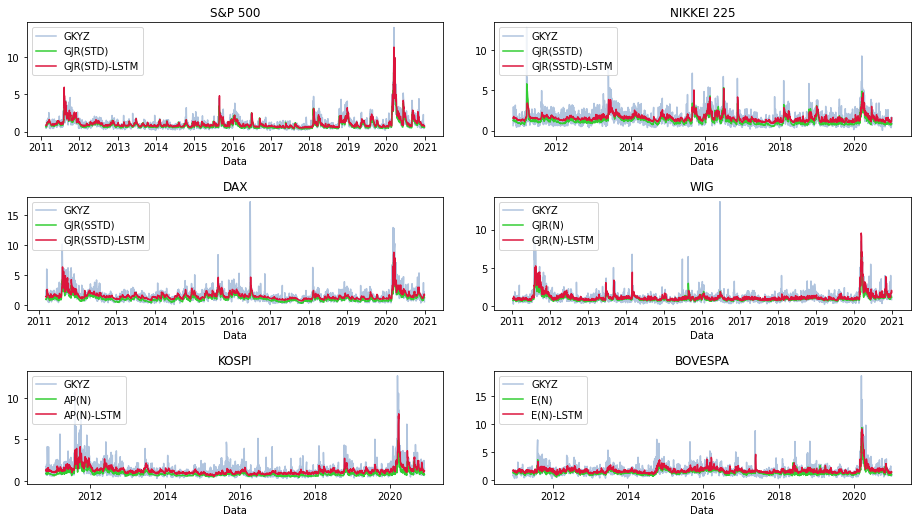

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(13, 7))
fig.tight_layout(h_pad=4, w_pad=2)

sns.lineplot(ax=axes[0, 0],data=snp_vol[["GKYZ", "GJR-GARCH-STD", "LSTM-GJR-GARCH-STD"]], palette=["lightsteelblue","limegreen", "crimson"], dashes=False)
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='')
axes[0,0].legend(loc='upper left', labels=["GKYZ", "GJR(STD)", "GJR(STD)-LSTM"])
sns.lineplot(ax=axes[0, 1],data=nkx_vol[["GKYZ", "GJR-GARCH-SSTD", "LSTM-GJR-GARCH-SSTD"]], palette=["lightsteelblue","limegreen", "crimson"], dashes=False)
axes[0,1].set(title='NIKKEI 225', xlabel='Data', ylabel='')
axes[0,1].legend(loc='upper left', labels=["GKYZ", "GJR(SSTD)", "GJR(SSTD)-LSTM"])
sns.lineplot(ax=axes[1, 0],data=dax_vol[["GKYZ", "GJR-GARCH-SSTD", "LSTM-GJR-GARCH-SSTD"]], palette=["lightsteelblue","limegreen", "crimson"], dashes=False)
axes[1,0].set(title='DAX', xlabel='Data', ylabel='')
axes[1,0].legend(loc='upper left', labels=["GKYZ", "GJR(SSTD)", "GJR(SSTD)-LSTM"])
sns.lineplot(ax=axes[1, 1],data=wig_vol[["GKYZ", "GJR-GARCH-NORM", "LSTM-GJR-GARCH-NORM"]], palette=["lightsteelblue","limegreen", "crimson"], dashes=False)
axes[1,1].set(title='WIG', xlabel='Data', ylabel='')
axes[1,1].legend(loc='upper left', labels=["GKYZ", "GJR(N)", "GJR(N)-LSTM"] )
sns.lineplot(ax=axes[2, 0],data=kospi_vol[["GKYZ", "APARCH-NORM", "LSTM-APARCH-NORM"]], palette=["lightsteelblue","limegreen", "crimson"], dashes=False)
axes[2,0].set(title='KOSPI', xlabel='Data', ylabel='')
axes[2,0].legend(loc='upper left', labels=["GKYZ", "AP(N)", "AP(N)-LSTM"])
sns.lineplot(ax=axes[2, 1],data=bvp_vol[["GKYZ", "EGARCH-NORM", "LSTM-EGARCH-NORM"]], palette=["lightsteelblue","limegreen", "crimson"], dashes=False)
axes[2,1].set(title='BOVESPA', xlabel='Data', ylabel='')
axes[2,1].legend(loc='upper left', labels=["GKYZ", "E(N)", "E(N)-LSTM"])



In [49]:
from scipy.stats import pearsonr

print(pearsonr(snp_vol["GJR-GARCH-STD"], snp_vol["LSTM-GJR-GARCH-STD"]))

print(pearsonr(nkx_vol["GJR-GARCH-SSTD"], nkx_vol["LSTM-GJR-GARCH-SSTD"]))

print(pearsonr(dax_vol["GJR-GARCH-SSTD"], dax_vol["LSTM-GJR-GARCH-SSTD"]))

print(pearsonr(wig_vol["GJR-GARCH-NORM"], wig_vol["LSTM-GJR-GARCH-NORM"]))

print(pearsonr(kospi_vol["APARCH-NORM"], kospi_vol["LSTM-APARCH-NORM"]))

print(pearsonr(bvp_vol["EGARCH-NORM"], bvp_vol["LSTM-EGARCH-NORM"]))

(0.9519521746258419, 0.0)
(0.9064547714055038, 0.0)
(0.9517167197426232, 0.0)
(0.944468145238358, 0.0)
(0.9301988305464599, 0.0)
(0.9058364783971514, 0.0)


In [11]:
VaR = feather.read_dataframe('../EXPORTS/VaR_snp.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)
#VaR

AttributeError: module 'pyarrow.feather' has no attribute 'read_dataframe'

NameError: name 'VaR' is not defined

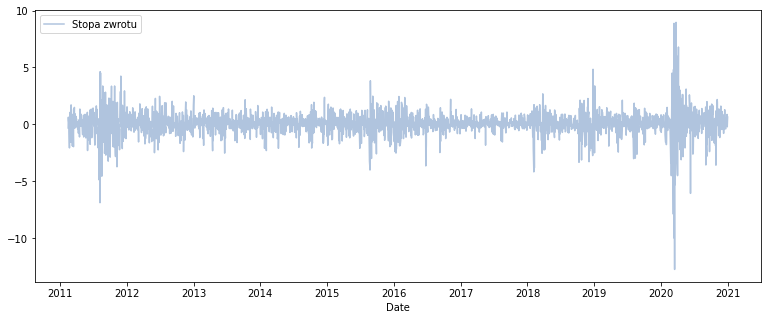

In [12]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=snp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - LSTM-GARCH-STD", "VaR 1% - LSTM-GJR-GARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
plt.title("S&P500 VaR")
plt.xlabel("Data")

In [13]:
VaR = feather.read_feather('../EXPORTS/VaR_nkx.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)

(-25.0, 9.0)

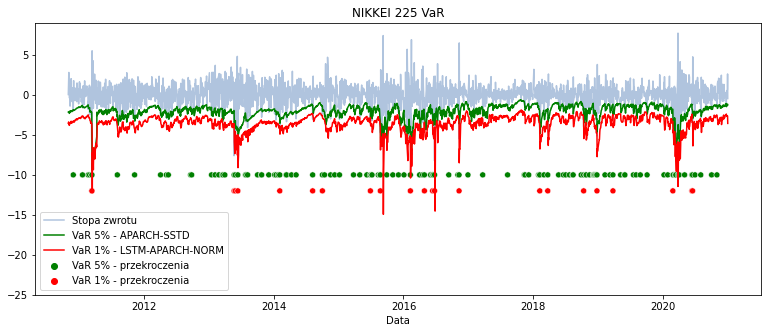

In [14]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=nkx_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - APARCH-SSTD", "VaR 1% - LSTM-APARCH-NORM"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
#plt.legend(loc='upper left')
plt.title("NIKKEI 225 VaR")
plt.xlabel("Data")

ax = plt.gca()
ax.set_ylim([-25, 9])

In [15]:
VaR = feather.read_dataframe('../EXPORTS/VaR_dax.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia', 'VaR 5% - EARCH-SSTD' : 'VaR 5% - EGARCH-SSTD'},  axis=1)

AttributeError: module 'pyarrow.feather' has no attribute 'read_dataframe'

KeyError: "['VaR 5% - EGARCH-SSTD'] not in index"

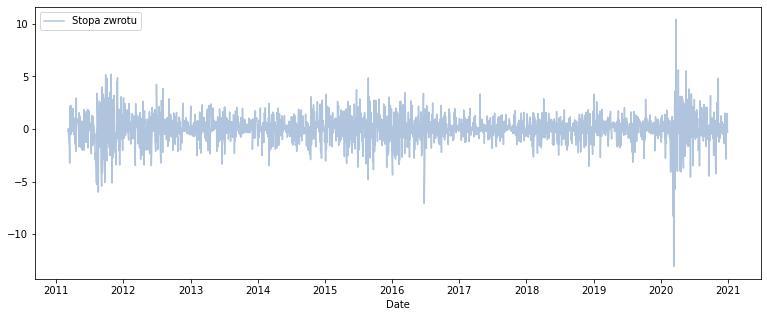

In [16]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=dax_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - EGARCH-SSTD", "VaR 1% - LSTM-APARCH-NORM"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
#plt.legend(loc='upper left')
plt.title("DAX VaR")
plt.xlabel("Data")

In [74]:
VaR = feather.read_dataframe('../EXPORTS/VaR_wig.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)

Text(0.5, 0, 'Data')

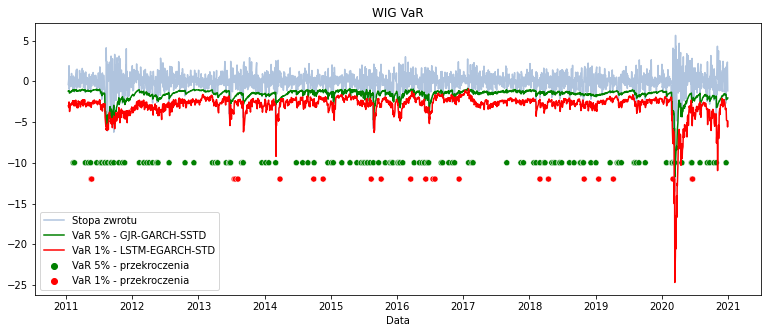

In [75]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=wig_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - GJR-GARCH-SSTD", "VaR 1% - LSTM-EGARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
#plt.legend(loc='upper left')
plt.title("WIG VaR")
plt.xlabel("Data")

In [24]:
VaR = feather.read_feather('../EXPORTS/VaR_kospi.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)

(-25.0, 9.0)

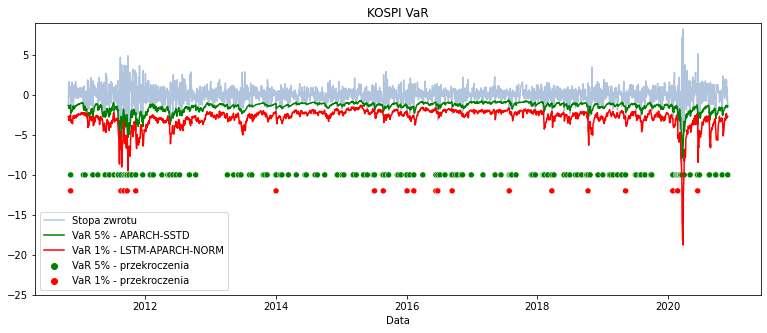

In [25]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=kospi_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - APARCH-SSTD", "VaR 1% - LSTM-APARCH-NORM"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
#plt.legend(loc='upper left')
plt.title("KOSPI VaR")
plt.xlabel("Data")

ax = plt.gca()
ax.set_ylim([-25, 9])

In [16]:
VaR = feather.read_dataframe('../EXPORTS/VaR_bvp.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)

In [17]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=bvp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - EGARCH-STD", "VaR 1% - GJR-GARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
#plt.legend(loc='upper left')
plt.title("BOVESPA VaR")
plt.xlabel("Data")

NameError: name 'bvp_vol' is not defined

<Figure size 936x360 with 0 Axes>

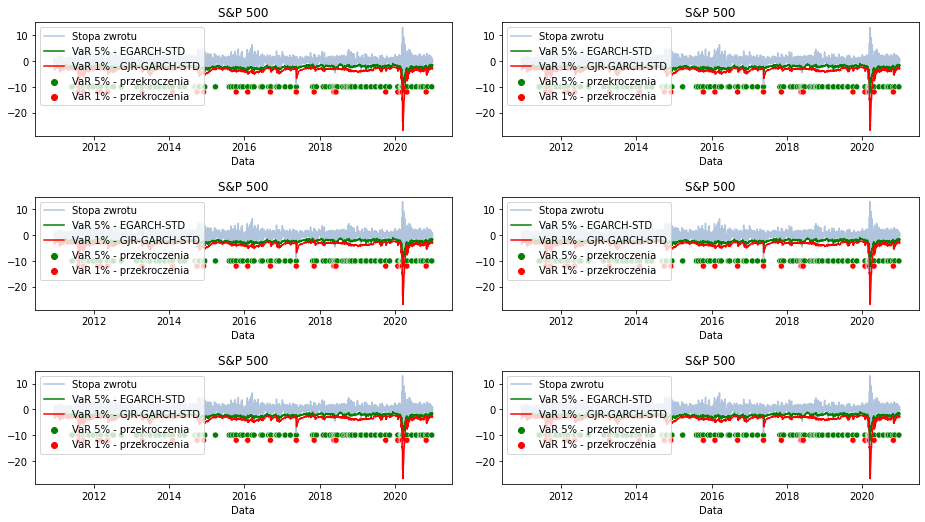

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(13, 7))
fig.tight_layout(h_pad=4, w_pad=2)

sns.lineplot(ax=axes[0, 0], data=bvp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(ax=axes[0, 0], data=VaR[["VaR 5% - EGARCH-STD", "VaR 1% - GJR-GARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(ax=axes[0, 0], data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(ax=axes[0, 0], data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
axes[0,0].set(title='S&P 500', xlabel='Data', ylabel='')
axes[0,0].legend(loc='upper left')
sns.lineplot(ax=axes[0, 1], data=bvp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(ax=axes[0, 1], data=VaR[["VaR 5% - EGARCH-STD", "VaR 1% - GJR-GARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(ax=axes[0, 1], data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(ax=axes[0, 1], data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
axes[0,1].set(title='S&P 500', xlabel='Data', ylabel='')
axes[0,1].legend(loc='upper left')
sns.lineplot(ax=axes[1, 0], data=bvp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(ax=axes[1, 0], data=VaR[["VaR 5% - EGARCH-STD", "VaR 1% - GJR-GARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(ax=axes[1, 0], data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(ax=axes[1, 0], data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
axes[1,0].set(title='S&P 500', xlabel='Data', ylabel='')
axes[1,0].legend(loc='upper left')
sns.lineplot(ax=axes[1, 1], data=bvp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(ax=axes[1, 1], data=VaR[["VaR 5% - EGARCH-STD", "VaR 1% - GJR-GARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(ax=axes[1, 1], data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(ax=axes[1, 1], data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
axes[1,1].set(title='S&P 500', xlabel='Data', ylabel='')
axes[1,1].legend(loc='upper left')
sns.lineplot(ax=axes[2, 0], data=bvp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(ax=axes[2, 0], data=VaR[["VaR 5% - EGARCH-STD", "VaR 1% - GJR-GARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(ax=axes[2, 0], data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(ax=axes[2, 0], data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
axes[2,0].set(title='S&P 500', xlabel='Data', ylabel='')
axes[2,0].legend(loc='upper left')
sns.lineplot(ax=axes[2, 1], data=bvp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(ax=axes[2, 1], data=VaR[["VaR 5% - EGARCH-STD", "VaR 1% - GJR-GARCH-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(ax=axes[2, 1], data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(ax=axes[2, 1], data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
axes[2,1].set(title='S&P 500', xlabel='Data', ylabel='')
axes[2,1].legend(loc='upper left')

In [32]:
VaR["VaR 5% hits"].value_counts()

True    153
Name: VaR 5% hits, dtype: int64

In [ ]:
####PORBABILISTYCZNE

In [58]:
VaR = feather.read_feather('../EXPORTS/VaR_snp_prob.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)
#VaR

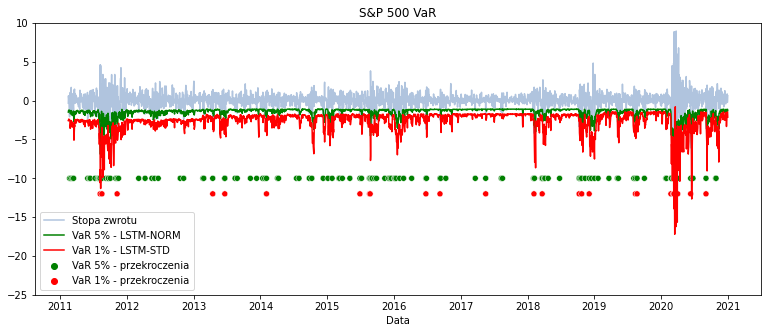

In [62]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=snp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - LSTM-NORM", "VaR 1% - LSTM-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
plt.title("S&P 500 VaR")
plt.xlabel("Data")

ax = plt.gca()
ax.set_ylim([-25, 10])
ax.legend(loc='lower left')

In [17]:
VaR = feather.read_feather('../EXPORTS/VaR_nkx_prob.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)
#VaR

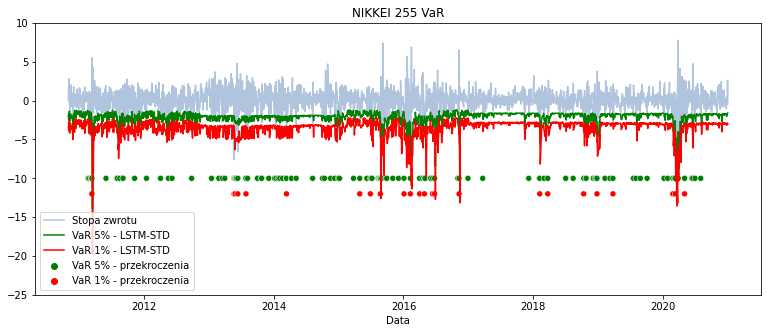

In [18]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=nkx_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - LSTM-STD", "VaR 1% - LSTM-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
plt.title("NIKKEI 255 VaR")
plt.xlabel("Data")

ax = plt.gca()
ax.set_ylim([-25, 10])
ax.legend(loc='lower left')

In [95]:
VaR = feather.read_feather('../EXPORTS/VaR_dax_prob.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)
#VaR

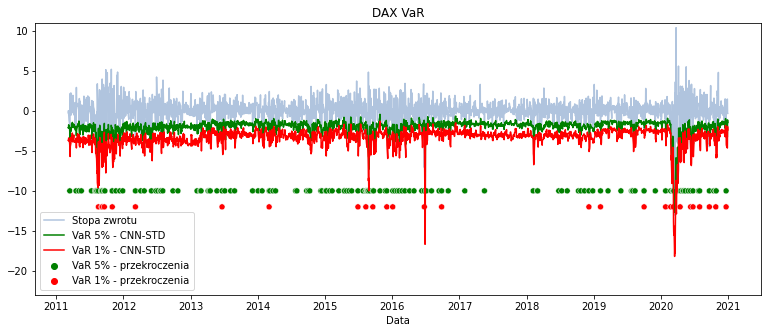

In [96]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=dax_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - CNN-STD", "VaR 1% - CNN-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
plt.title("DAX VaR")
plt.xlabel("Data")

ax = plt.gca()
ax.set_ylim([-23, 11])
ax.legend(loc='lower left')

In [19]:
VaR = feather.read_feather('../EXPORTS/VaR_wig_prob.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)
#VaR

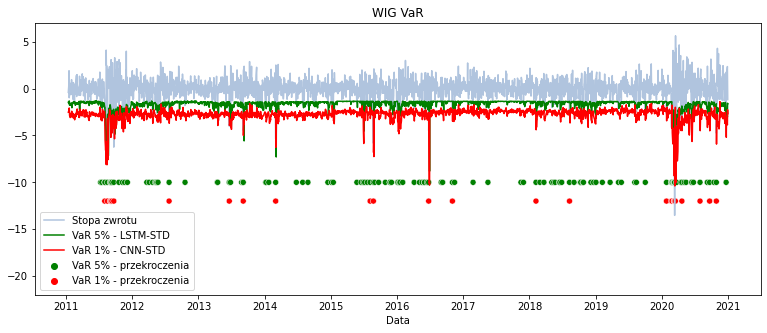

In [20]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=wig_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - LSTM-STD", "VaR 1% - CNN-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
plt.title("WIG VaR")
plt.xlabel("Data")

ax = plt.gca()
ax.set_ylim([-22, 7])
ax.legend(loc='lower left')

In [21]:
VaR = feather.read_feather('../EXPORTS/VaR_kospi_prob.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)
#VaR

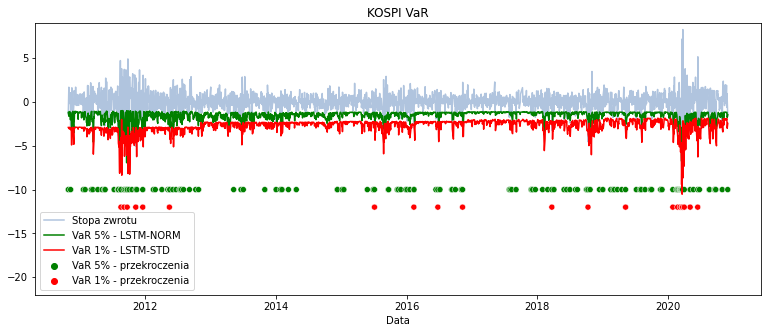

In [22]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=kospi_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - LSTM-NORM", "VaR 1% - LSTM-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
plt.title("KOSPI VaR")
plt.xlabel("Data")

ax = plt.gca()
ax.set_ylim([-22, 9])
ax.legend(loc='lower left')

In [23]:
VaR = feather.read_feather('../EXPORTS/VaR_bvp_prob.feather')
VaR = VaR.set_index("Date")

#remove false points, set to nan
VaR[['VaR 5% hits']] = VaR[['VaR 5% hits']].where(VaR[['VaR 5% hits']] == True)
VaR[['VaR 1% hits']] = VaR[['VaR 1% hits']].where(VaR[['VaR 1% hits']] == True)

VaR = VaR.rename({'VaR 5% hits' : 'VaR 5% - przekroczenia', 'VaR 1% hits' : 'VaR 1% - przekroczenia'},  axis=1)
#VaR

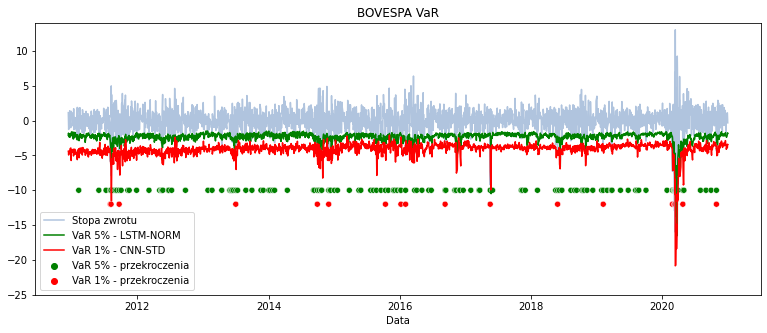

In [24]:
#plot
#VaR.plot(figsize=(13,5))
plt.figure(figsize=(13, 5))
sns.lineplot(data=bvp_vol[["Stopa zwrotu"]], palette=["lightsteelblue"])
sns.lineplot(data=VaR[["VaR 5% - LSTM-NORM", "VaR 1% - CNN-STD"]], palette=["green", "red"], dashes=False)
sns.scatterplot(data=VaR[['VaR 5% - przekroczenia']]*-10, palette=["green"])
sns.scatterplot(data=VaR[['VaR 1% - przekroczenia']]*-12, palette=["red"])
plt.title("BOVESPA VaR")
plt.xlabel("Data")

ax = plt.gca()
ax.set_ylim([-25, 14])
ax.legend(loc='lower left')